In [66]:
import numpy as np
import os
import glob
import ntpath
import pandas as pd
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random
from PIL import Image
import glob

def capitalize(s):
    return s[:1].upper() + s[1:]

In [67]:
!cd ./data/ && rm *.csv

# Creamos los folds

In [68]:
images='ImagenesCaras'

def writeTrainingSetFold(name, startTest,finishTest):
    file_obj  = open("./training/training-fold-" +name + ".txt", "w") 
    for j in range(1,42):    
        for i in range(1,11): 
            if i < startTest or i >= finishTest:
                file_obj.write("../"+images+"/s"+str(j)+"/"+str(i)+".pgm, "+str(j)+",\n")
    file_obj.close()
    
def writeSmallTrainingSetFold(name, startTest,finishTest, quantity):
    file_obj  = open("./training/small-"+str(quantity)+"-training-fold-" +name + ".txt", "w") 
    for j in range(1,42):    
        q = 0
        for i in range(1,11): 
            if (i < startTest or i >= finishTest) and quantity >= q:
                file_obj.write("../"+images+"/s"+str(j)+"/"+str(i)+".pgm, "+str(j)+",\n")
                q = q+1
    file_obj.close()

def writeTestingSetFold(name,startTest,finishTest):
    file_obj  = open("./testing/testing-fold-" +name + ".txt", "w") 
    for j in range(1,42):    
        for i in range(1,11): 
            if i >= startTest and i < finishTest:
                file_obj.write("../"+images+"/s"+str(j)+"/"+str(i)+".pgm, "+str(j)+",\n")
    file_obj.close()


In [69]:
k = 5
imagesPerClass = 10
foldSize = 10/5

for i in range(1,11,2):
    j = int(i / 2)
    writeTrainingSetFold(str(j),i,i+2)
    writeTestingSetFold(str(j),i,i+2)    
    for numImgs in range(1,imagesPerClass - 1):
        writeSmallTrainingSetFold(str(j),i,i+2, numImgs)
    

In [70]:
! ls

data  graphs  Laboratorio.ipynb  testing  training


# Borramos la experimentacion previa:

In [71]:
! cd ./data && ls && rm *.csv

rm: cannot remove '*.csv': No such file or directory


In [72]:
def refreshResults(i):
    filename = "./data/metrics-"+i+".csv"
    f = open(filename,"w+")
    f.write("k;alpha;averageAccurracy;averagePrecision;averageRecall;averageF1\n")
    f.close()
    
    
for i in range(0,5):
    refreshResults(str(i))
    refreshResults(str(i)+"-knn")    

# Experimentamos solo kNN

In [44]:
for i in range(0,5):
    for k in range(1,32,3):
        j = str(i) + "-knn"
        training = "../experimentacion/training/training-fold-"+str(i)+".txt"
        testing = "../experimentacion/testing/testing-fold-"+str(i)+".txt"
        metrics = "../experimentacion/data/metrics-"+j+".csv"
        output = "../experimentacion/data/output-"+j+".csv"
        time = "../experimentacion/data/time-"+j+".csv"
        ! ../cmake-build-debug/caralibro -i  $training -q $testing -m 0 -o $output -metrics $metrics -k $k -time $time
        print("Done fold: "+str(i)+", neighbours:"+str(k)+"")

Done fold: 0, neighbours:1
Done fold: 0, neighbours:4
Done fold: 0, neighbours:7
Done fold: 0, neighbours:10
Done fold: 0, neighbours:13
Done fold: 0, neighbours:16
Done fold: 0, neighbours:19
Done fold: 0, neighbours:22
Done fold: 0, neighbours:25
Done fold: 0, neighbours:28
Done fold: 0, neighbours:31
Done fold: 1, neighbours:1
Done fold: 1, neighbours:4
Done fold: 1, neighbours:7
Done fold: 1, neighbours:10
Done fold: 1, neighbours:13
Done fold: 1, neighbours:16
Done fold: 1, neighbours:19
Done fold: 1, neighbours:22
Done fold: 1, neighbours:25
Done fold: 1, neighbours:28
Done fold: 1, neighbours:31
Done fold: 2, neighbours:1
Done fold: 2, neighbours:4
Done fold: 2, neighbours:7
Done fold: 2, neighbours:10
Done fold: 2, neighbours:13
Done fold: 2, neighbours:16
Done fold: 2, neighbours:19
Done fold: 2, neighbours:22
Done fold: 2, neighbours:25
Done fold: 2, neighbours:28
Done fold: 2, neighbours:31
Done fold: 3, neighbours:1
Done fold: 3, neighbours:4
Done fold: 3, neighbours:7
Done

In [62]:
simpleframes = [ pd.read_csv("./data/metrics-"+str(i)+"-knn.csv", delimiter=";") for i in range(0,5) ]
simpleresult = pd.concat(simpleframes)

resultgrouped = simpleresult.groupby(["k"]).mean() 
resultgrouped

,alpha,averageAccurracy,averagePrecision,averageRecall,averageF1
k,,,,,
1,15,0.998691,0.980488,0.973171,0.971707
4,15,0.998215,0.974797,0.963415,0.961138
7,15,0.994765,0.930894,0.892683,0.876748
10,15,0.992029,0.897398,0.836585,0.819071
13,15,0.990125,0.872521,0.797561,0.768200
16,15,0.987864,0.839350,0.751220,0.735424
19,15,0.987151,0.838548,0.736585,0.716709
22,15,0.986437,0.829117,0.721951,0.691367
25,15,0.986318,0.826841,0.719512,0.695687


In [27]:


def plotMetric(df,xMetric, metric,extraTitle, save):
    columns = [column for column in df.columns if column == metric or column == xMetric]
    newdf = df[columns]    
    ax = newdf.plot()
    ax.set_ylabel("")
    ax.set_xlabel("Valor de: "+ xMetric)
    title = capitalize(metric)+" en funcion de: " +capitalize(xMetric)+" media de analisis 5-Fold "+extraTitle
    plt.title(title)
    if(save):
        plt.savefig("./graphs/"+title)
    else:        
        plt.show()
    
    

In [31]:
for metricToMeasure in ["averageAccurracy","averagePrecision","averageRecall","averageF1"]:
    plotMetric(resultgrouped,"k" , metricToMeasure, "para knn Sin PCA", False)

# Experimentamos con PCA

In [20]:
for i in range(0,5):
    for alpha in [1,2,3,4,8,15,30,70,150]:
        for k in range(1,32,3):
            training = "../experimentacion/training/training-fold-"+str(i)+".txt"
            testing = "../experimentacion/testing/testing-fold-"+str(i)+".txt"
            metrics = "../experimentacion/data/metrics-"+str(i)+".csv"
            output = "../experimentacion/data/output-"+str(i)+".csv"
            time = "../experimentacion/data/time-"+str(i)+".csv"
            ! ../cmake-build-debug/caralibro -i  $training -q $testing -m 1 -o $output -metrics $metrics -k $k -alpha $alpha -time $time
            print("Done k: "+str(i)+" alpha: "+str(alpha)+", neighbours:"+str(k)+"")

Done k: 0 alpha: 1, neighbours:1
Done k: 0 alpha: 1, neighbours:4
Done k: 0 alpha: 1, neighbours:7
Done k: 0 alpha: 1, neighbours:10
Done k: 0 alpha: 1, neighbours:13
Done k: 0 alpha: 1, neighbours:16
Done k: 0 alpha: 1, neighbours:19
Done k: 0 alpha: 1, neighbours:22
Done k: 0 alpha: 1, neighbours:25
Done k: 0 alpha: 1, neighbours:28
Done k: 0 alpha: 1, neighbours:31
Done k: 0 alpha: 2, neighbours:1
Done k: 0 alpha: 2, neighbours:4
Done k: 0 alpha: 2, neighbours:7
Done k: 0 alpha: 2, neighbours:10
Done k: 0 alpha: 2, neighbours:13
Done k: 0 alpha: 2, neighbours:16
Done k: 0 alpha: 2, neighbours:19
Done k: 0 alpha: 2, neighbours:22
Done k: 0 alpha: 2, neighbours:25
Done k: 0 alpha: 2, neighbours:28
Done k: 0 alpha: 2, neighbours:31
Done k: 0 alpha: 3, neighbours:1
Done k: 0 alpha: 3, neighbours:4
Done k: 0 alpha: 3, neighbours:7
Done k: 0 alpha: 3, neighbours:10
Done k: 0 alpha: 3, neighbours:13
Done k: 0 alpha: 3, neighbours:16
Done k: 0 alpha: 3, neighbours:19
Done k: 0 alpha: 3, nei

Done k: 2 alpha: 4, neighbours:28
Done k: 2 alpha: 4, neighbours:31
Done k: 2 alpha: 8, neighbours:1
Done k: 2 alpha: 8, neighbours:4
Done k: 2 alpha: 8, neighbours:7
Done k: 2 alpha: 8, neighbours:10
Done k: 2 alpha: 8, neighbours:13
Done k: 2 alpha: 8, neighbours:16
Done k: 2 alpha: 8, neighbours:19
Done k: 2 alpha: 8, neighbours:22
Done k: 2 alpha: 8, neighbours:25
Done k: 2 alpha: 8, neighbours:28
Done k: 2 alpha: 8, neighbours:31
Done k: 2 alpha: 15, neighbours:1
Done k: 2 alpha: 15, neighbours:4
Done k: 2 alpha: 15, neighbours:7
Done k: 2 alpha: 15, neighbours:10
Done k: 2 alpha: 15, neighbours:13
Done k: 2 alpha: 15, neighbours:16
Done k: 2 alpha: 15, neighbours:19
Done k: 2 alpha: 15, neighbours:22
Done k: 2 alpha: 15, neighbours:25
Done k: 2 alpha: 15, neighbours:28
Done k: 2 alpha: 15, neighbours:31
Done k: 2 alpha: 30, neighbours:1
Done k: 2 alpha: 30, neighbours:4
Done k: 2 alpha: 30, neighbours:7
Done k: 2 alpha: 30, neighbours:10
Done k: 2 alpha: 30, neighbours:13
Done k:

Done k: 4 alpha: 70, neighbours:19
Done k: 4 alpha: 70, neighbours:22
Done k: 4 alpha: 70, neighbours:25
Done k: 4 alpha: 70, neighbours:28
Done k: 4 alpha: 70, neighbours:31
Done k: 4 alpha: 150, neighbours:1
Done k: 4 alpha: 150, neighbours:4
Done k: 4 alpha: 150, neighbours:7
Done k: 4 alpha: 150, neighbours:10
Done k: 4 alpha: 150, neighbours:13
Done k: 4 alpha: 150, neighbours:16
Done k: 4 alpha: 150, neighbours:19
Done k: 4 alpha: 150, neighbours:22
Done k: 4 alpha: 150, neighbours:25
Done k: 4 alpha: 150, neighbours:28
Done k: 4 alpha: 150, neighbours:31


## Obtenemos el índice del máximo

In [65]:
#concatenamos los folds
frames = [ pd.read_csv("./data/metrics-"+str(i)+".csv", delimiter=";") for i in range(0,5) ]
pcaresult = pd.concat(frames)
resultgrouped = pcaresult.groupby(["alpha","k"]).mean() 
# resultgrouped.loc[:,'averageF1'] *= 2 

resultgrouped.idxmax()
# resultgrouped = resultgrouped.unstack(level=[0])
# df = pd.DataFrame(resultgrouped.to_records())
# df
resultgrouped

averageAccurracy  averagePrecision  averageRecall  averageF1
alpha k                                                               
1     1           0.956811          0.251098       0.114634   0.723043
      4           0.956811          0.289838       0.114634   0.679570
      7           0.957287          0.317046       0.124390   0.669609
      10          0.957406          0.325927       0.126829   0.661929
      13          0.958239          0.371057       0.143902   0.609431
      16          0.958120          0.398072       0.141464   0.565707
      19          0.958477          0.422714       0.148780   0.554638
      22          0.958715          0.451972       0.153659   0.492715
      25          0.958358          0.491347       0.146341   0.453899
      28          0.958953          0.522208       0.158537   0.429847
      31          0.959310          0.521756       0.165854   0.436893
2     1           0.970494          0.496260       0.395122   0.652706
      4           0.969661          0.485529       0.378049   0.667468
      7           0.970851          0.526794       0.402439   0.631967
      10          0.969304          0.515354       0.370732   0.603643
      13          0.969661          0.543008       0.378049   0.560817
      16          0.970018          0.545517       0.385366   0.576605
      19          0.970018          0.550523       0.385366   0.550604
      22          0.969780          0.566504       0.380488   0.526264
      25          0.970018          0.568477       0.385366   0.527987
      28          0.969066          0.558153       0.365854   0.503755
      31          0.968709          0.585265       0.358537   0.466304
3     1           0.983938          0.733903       0.670732   0.721208
      4           0.982035          0.706841       0.631707   0.680449
      7           0.980012          0.697480       0.590244   0.661765
      10          0.978703          0.680174       0.563415   0.620193
      13          0.976443          0.658734       0.517073   0.583647
      16          0.974896          0.616864       0.485366   0.587851
      19          0.974658          0.634379       0.480488   0.588742
      22          0.974182          0.626810       0.470732   0.594933
...                    ...               ...            ...        ...
30    10          0.987507          0.829280       0.743903   0.729369
      13          0.984771          0.799512       0.687805   0.670221
      16          0.982748          0.773833       0.646341   0.652784
      19          0.981678          0.756678       0.624390   0.625652
      22          0.981202          0.761475       0.614634   0.599984
      25          0.980250          0.744774       0.595122   0.596601
      28          0.980012          0.750236       0.590244   0.587078
      31          0.979536          0.739841       0.580488   0.577236
70    1           0.997383          0.966667       0.946341   0.937886
      4           0.994646          0.933171       0.890244   0.879884
      7           0.991791          0.882358       0.831707   0.831266
      10          0.987626          0.830093       0.746342   0.731646
      13          0.984890          0.800650       0.690244   0.673984
      16          0.982986          0.777979       0.651219   0.650972
      19          0.981678          0.755540       0.624390   0.624978
      22          0.981083          0.748331       0.612195   0.612490
      25          0.980012          0.742822       0.590244   0.590399
      28          0.979655          0.736810       0.582927   0.594457
      31          0.979298          0.738622       0.575610   0.571708
150   1           0.997383          0.966667       0.946341   0.937886
      4           0.994646          0.933171       0.890244   0.879884
      7           0.991791          0.882358       0.831707   0.831266
      10          0.987626          0.830093       0.746342   0.731646
      13          0.984890        

In [51]:
for metric in ["Accurracy","Precision","Recall","F1"]:
    df = pd.DataFrame(resultgrouped.to_records())
    columns = [column for column in df.columns if (metric in column or column == "k") ]
    newdf = df[columns]    
    ax = newdf.plot(x='k',logy=False)
    ax.set_ylabel(metric)
    ax.set_xlabel("K: Cantidad de vecinos más cercanos" )
    title = metric +" en función de K para distintos alpha"
    plt.title(title)
#     plt.show()
    plt.savefig("./graphs/"+title)
    


In [104]:
for metricToMeasure in ["averageAccurracy","averagePrecision","averageRecall","averageF1"]:
    plotMetric(resultgrouped,"Alpha y K" , metricToMeasure, "para knn Con PCA", True)

In [199]:
def plotFrame(df,idx):
    for al in range(1,328,47):
        copydf = df[df.alpha == al]
#         columns = [column for column in copydf.columns if column != 'alpha']
        columns = [column for column in copydf.columns if column != 'alpha' and column != 'averagePrecision' and column != 'averageRecall' and column != 'averageF1']
        newdf = copydf[columns]    
        ax = newdf.plot(x="k", logy=False)
        ax.set_ylabel("")
        ax.set_xlabel("Valor de K" )
        title = "Fold: "+str(idx) + ", Alpha: " +str(al)
        plt.title(title)
        plt.show()
#         plt.savefig("./graphs/"+title)

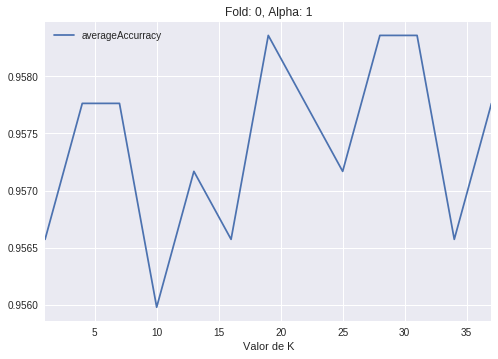

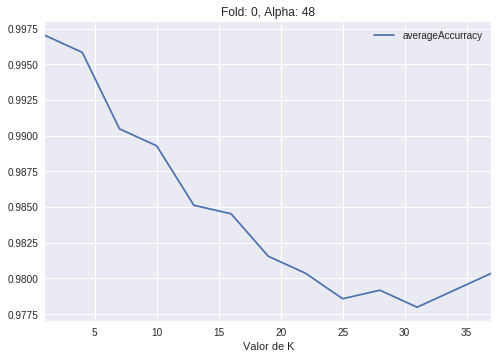

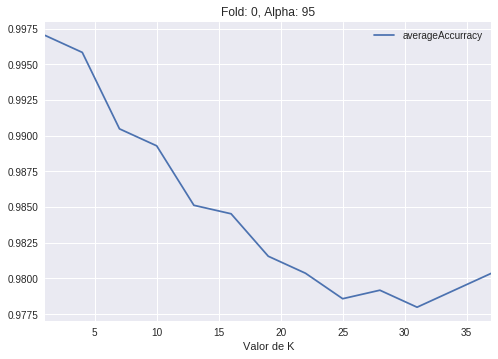

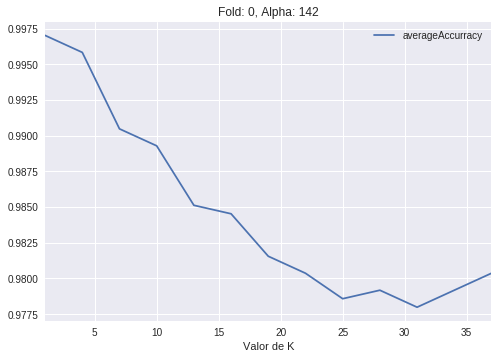

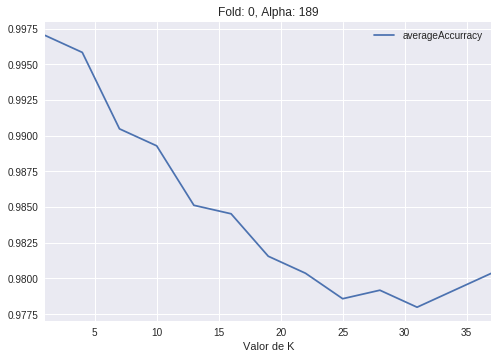

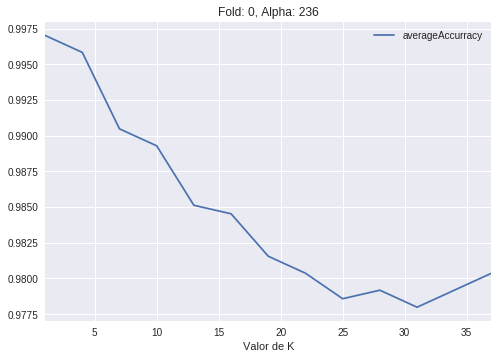

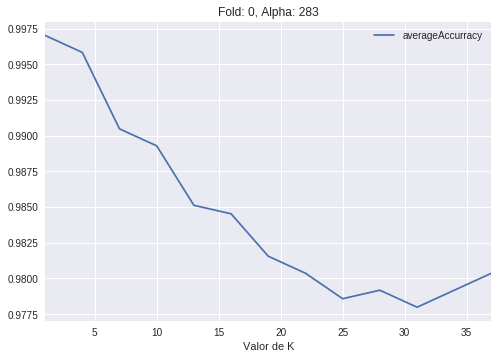

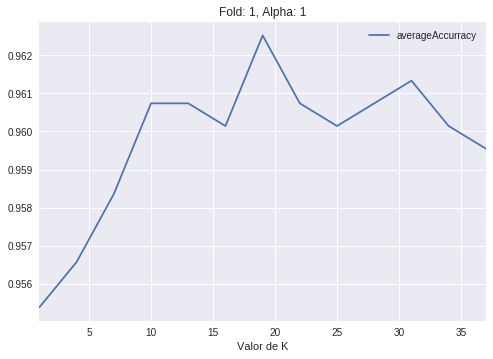

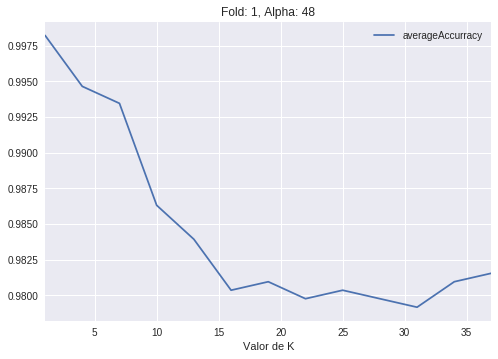

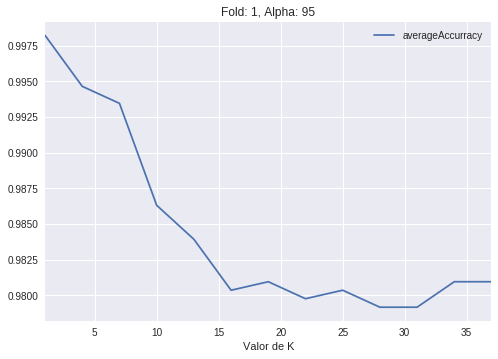

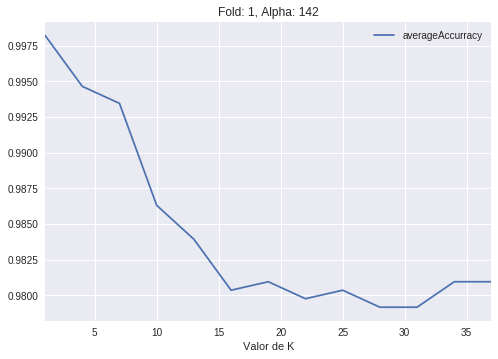

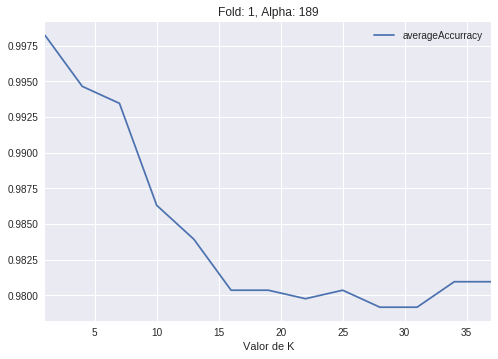

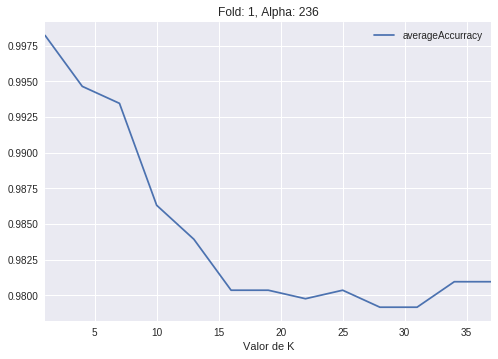

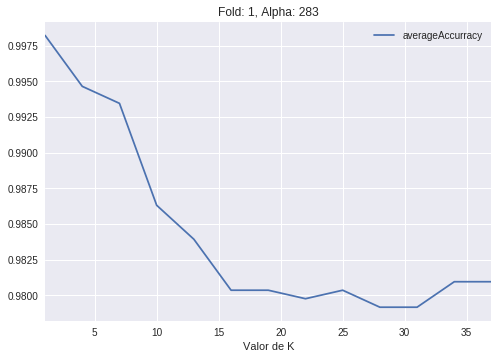

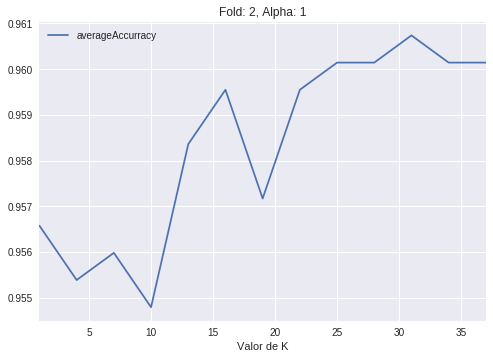

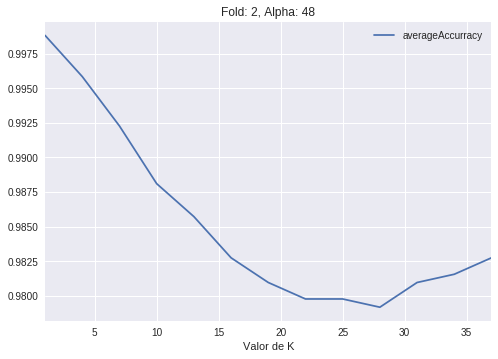

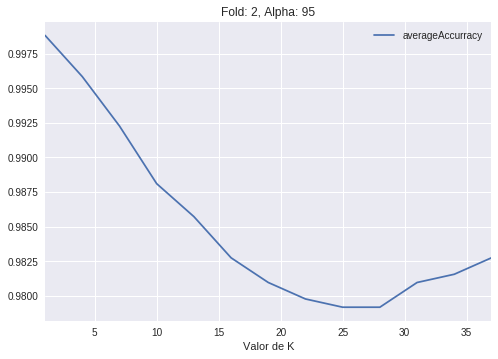

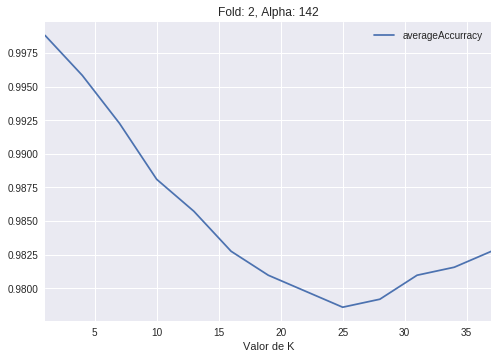

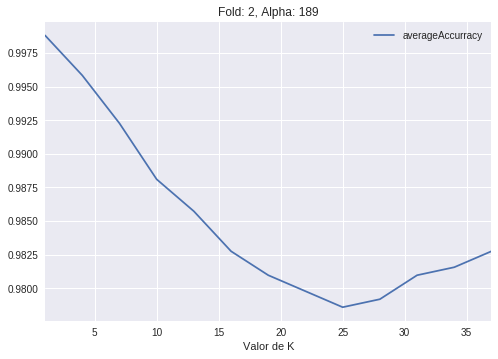

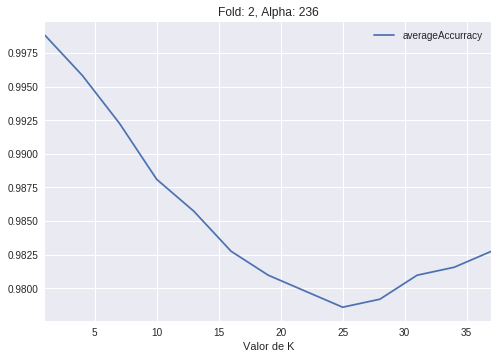

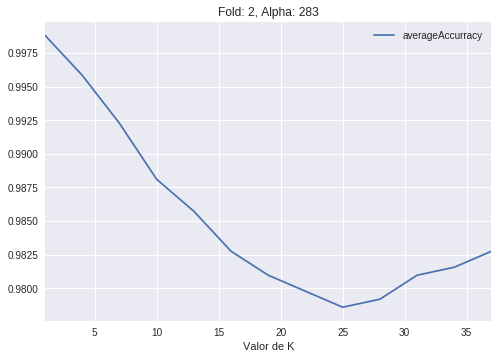

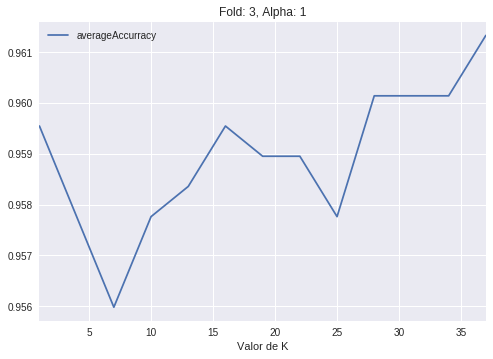

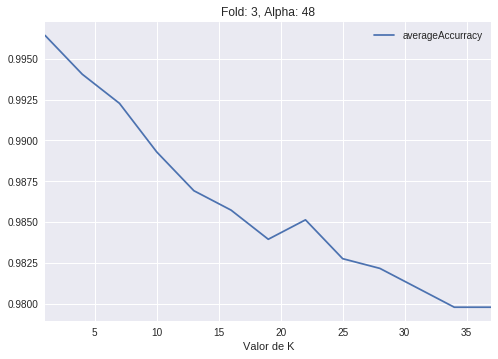

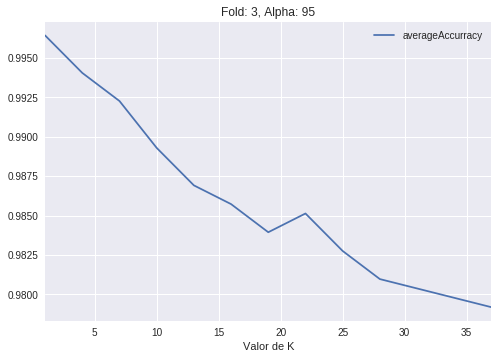

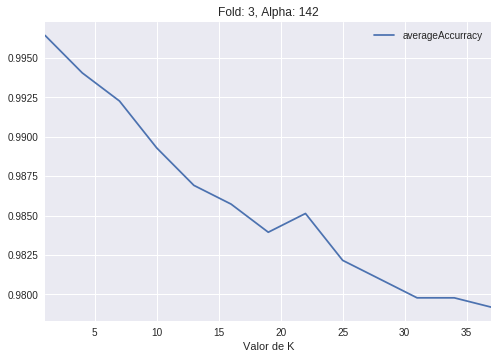

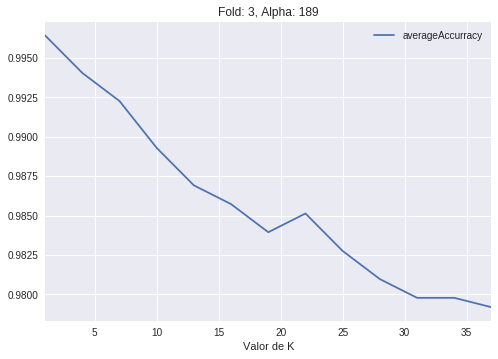

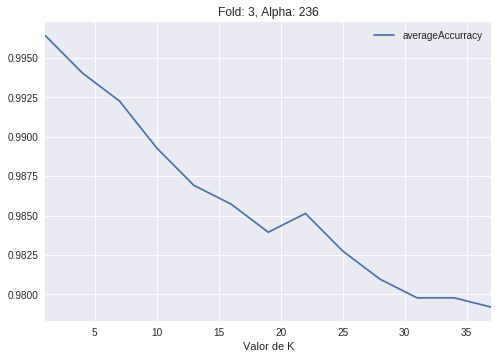

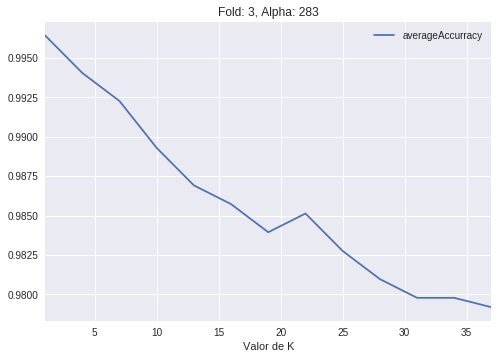

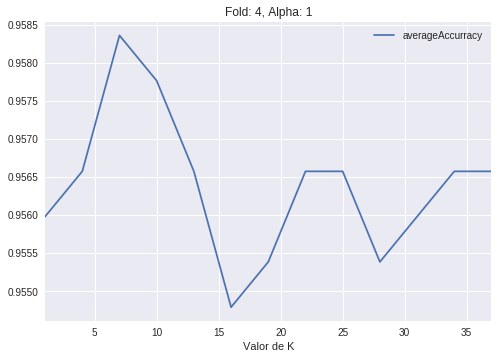

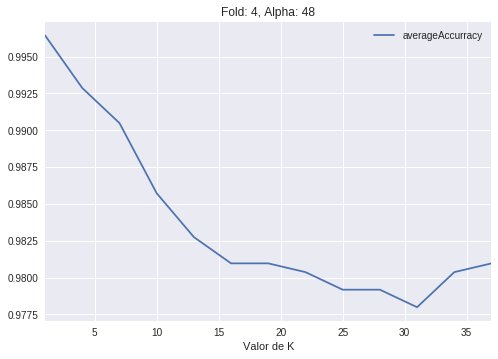

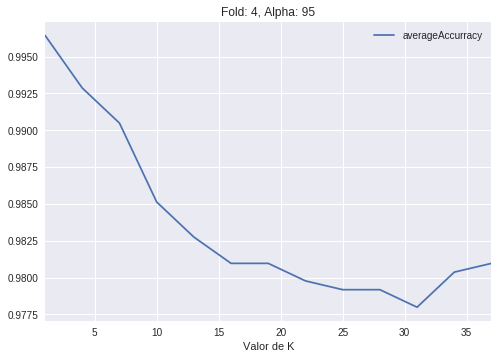

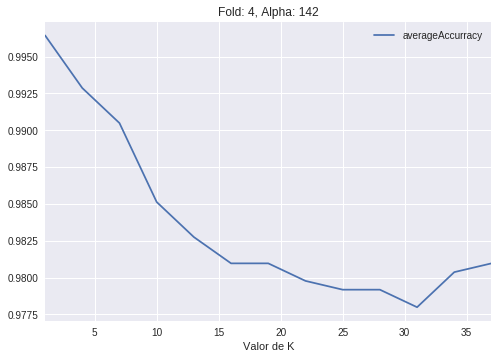

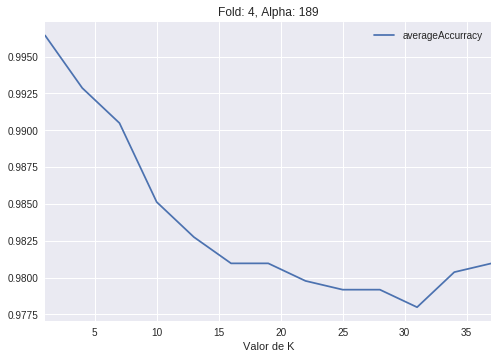

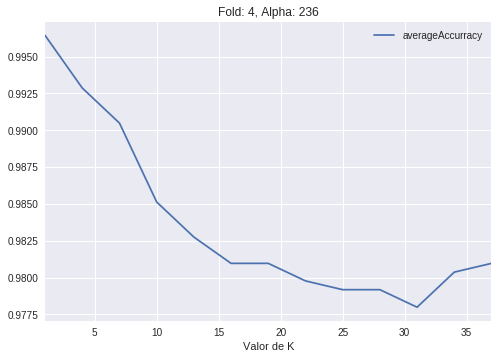

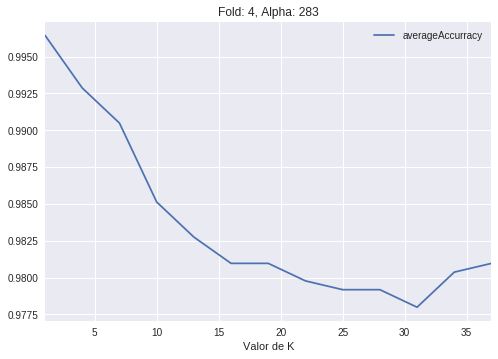

In [201]:
for idx,frame in enumerate(frames):
    plotFrame(frame,idx)

In [83]:
resultgrouped = result.groupby(["alpha","k"]).mean() 

In [ ]:
resultgrouped

# Medimos si el tamaño del dataset mejora PCA

In [82]:
def refreshResults(i):
    for numImgs in range(1,imagesPerClass - 1):
        filename = "./data/small-"+str(numImgs)+"-metrics-"+i+".csv"
        f = open(filename,"w+")
        f.write("k;alpha;averageAccurracy;averagePrecision;averageRecall;averageF1\n")
        f.close()
    
    
for i in range(0,5):
    refreshResults(str(i))

In [83]:
alpha = 70
k = 1
for i in range(0,5):
    for numImgs in range(1,imagesPerClass - 1):
        training = "../experimentacion/training/small-"+str(numImgs)+"-training-fold-"+str(i)+".txt"
        testing = "../experimentacion/testing/testing-fold-"+str(i)+".txt"
        metrics = "../experimentacion/data/small-"+str(numImgs)+"-metrics-"+str(i)+".csv"
        output = "../experimentacion/data/small-"+str(numImgs)+"-output-"+str(i)+".csv"
        ! ../cmake-build-debug/caralibro -i  $training -q $testing -m 1 -o $output -metrics $metrics -k $k -alpha $alpha -time $time
        print("Done k: "+str(i)+" alpha: "+str(alpha)+", neighbours:"+str(k)+"")

Done k: 0 alpha: 70, neighbours:1
Done k: 0 alpha: 70, neighbours:1
Done k: 0 alpha: 70, neighbours:1
Done k: 0 alpha: 70, neighbours:1
Done k: 0 alpha: 70, neighbours:1
Done k: 0 alpha: 70, neighbours:1
Done k: 0 alpha: 70, neighbours:1
Done k: 0 alpha: 70, neighbours:1
Done k: 1 alpha: 70, neighbours:1
Done k: 1 alpha: 70, neighbours:1
Done k: 1 alpha: 70, neighbours:1
Done k: 1 alpha: 70, neighbours:1
Done k: 1 alpha: 70, neighbours:1
Done k: 1 alpha: 70, neighbours:1
Done k: 1 alpha: 70, neighbours:1
Done k: 1 alpha: 70, neighbours:1
Done k: 2 alpha: 70, neighbours:1
Done k: 2 alpha: 70, neighbours:1
Done k: 2 alpha: 70, neighbours:1
Done k: 2 alpha: 70, neighbours:1
Done k: 2 alpha: 70, neighbours:1
Done k: 2 alpha: 70, neighbours:1
Done k: 2 alpha: 70, neighbours:1
Done k: 2 alpha: 70, neighbours:1
Done k: 3 alpha: 70, neighbours:1
Done k: 3 alpha: 70, neighbours:1
Done k: 3 alpha: 70, neighbours:1
Done k: 3 alpha: 70, neighbours:1
Done k: 3 alpha: 70, neighbours:1
Done k: 3 alph

In [128]:
dfs = {}
for numImgs in range(1,imagesPerClass-1):
    dfs[numImgs] = pd.concat([pd.read_csv("./data/small-"+str(numImgs)+"-metrics-"+str(i)+".csv", delimiter=";") for i in range(0,5)])
    dfs[numImgs] = dfs[numImgs].groupby('k').mean()
    dfs[numImgs] = 

pd.concat([dfs[numImgs] for numImgs in range(1,imagesPerClass-1)])

,alpha,averageAccurracy,averagePrecision,averageRecall,averageF1
k,,,,,
1,70,0.987150,0.812195,0.736585,0.746458
1,70,0.989530,0.846667,0.785366,0.785831
1,70,0.991196,0.880162,0.819512,0.795052
1,70,0.993337,0.909594,0.863415,0.843786
1,70,0.995955,0.945529,0.917073,0.907480
1,70,0.997026,0.960976,0.939024,0.931382
1,70,0.997383,0.966667,0.946341,0.937886
1,70,0.997383,0.966667,0.946341,0.937886


# Miremos cuánto tarda entrenar con PCA con Knn

In [122]:
! cd ./data && ls && rm time.csv
def refreshResults(i):
    filename = "./data/time-"+str(i)+".csv"
    f = open(filename,"w+")
    f.write("mode;k;alpha;Training Time;Evaluation Time\n")
    f.close()
refreshResults(1)

metrics.csv   output.csv     results-1.csv  results-3.csv  results.csv
output-1.csv  results-0.csv  results-2.csv  results-4.csv  time-1.csv
rm: cannot remove 'time.csv': No such file or directory


In [31]:

for alpha in range(1,644,20):
    training = "../experimentacion/training/training-fold-"+str(1)+".txt"
    testing = "../experimentacion/testing/testing-fold-"+str(1)+".txt"
    metrics = "../experimentacion/data/metrics-"+str(1)+".csv"
    output = "../experimentacion/data/output-"+str(1)+".csv"
    time = "../experimentacion/data/time-"+str(1)+".csv"
    ! ../cmake-build-debug/caralibro -i  $training -q $testing -m 1 -o $output -alpha $alpha -time $time 
            

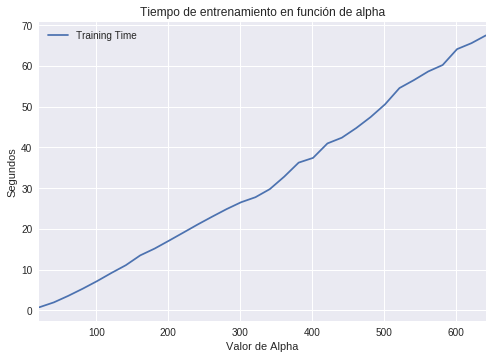

In [36]:
df = pd.read_csv("./data/time-1.csv", delimiter = ";")
copydf = df
columns = [column for column in copydf.columns if column == 'alpha' or column == 'Training Time']
newdf = copydf[columns]    
ax = newdf.plot(x="alpha", logy=False)
ax.set_ylabel("Segundos")
ax.set_xlabel("Valor de Alpha" )
title = "Tiempo de entrenamiento en función de alpha"
plt.title(title)
plt.show()
plt.savefig("./graphs/"+title)


# Miremos como aumenta el tiempo de evaluacion en función de los pixels

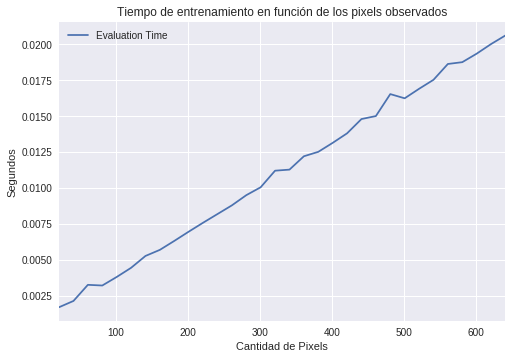

In [38]:
df = pd.read_csv("./data/time-1.csv", delimiter = ";")
copydf = df
columns = [column for column in copydf.columns if column == 'alpha' or column == 'Evaluation Time']
newdf = copydf[columns]    
ax = newdf.plot(x="alpha", logy=False)
ax.set_ylabel("Segundos")
ax.set_xlabel("Cantidad de Pixels" )
title = "Tiempo de entrenamiento en función de los pixels observados"
plt.title(title)
plt.show()
plt.savefig("./graphs/"+title)
